In [13]:
!pip install xgboost
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import RepeatedKFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

In [2]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/Multivariate_RF.csv")
df.head()

,Hospital,Main Unit,Age,Gender,Ethnicity,Highest Educational Level,Marital Status,Have Children?,No. of Children have,Age of the youngest child,...,Frequency of facing struggles with patients,Cleanliness,Safety,Availability and accessibility,Sufficient rest areas,BMI,P/N Ratio,CS_Score,BO_Score,STS_Score
0,DMH,Inward,29,Female,Sinhala,Diploma in Nursing,Married,Yes,1,Less than 1 yr,...,Very low,High,High,High,High,17.777778,20.000000,42,35,29
1,DMH,Inward,25,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,Very high,Very high,Very high,Very high,Very high,25.299376,2.058824,48,42,40
2,DMH,Inward,28,Female,Sinhala,BSc. Nursing,Married,No,999,Not relevant,...,High,High,High,Average,Average,22.313278,2.000000,32,33,35
3,DMH,Inward,43,Female,Sinhala,BSc. (Hons) in Nursing,Married,Yes,3,4 - 7 yrs,...,Low,High,High,High,Low,25.631168,1.750000,45,39,33
4,DMH,Inward,28,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,Average,High,High,High,High,22.666667,1.764706,42,44,37


In [3]:
df.shape

(368, 40)

In [4]:
cat_cols = ['Highest Educational Level', 'Daily travelling Distance', 'Total Working Hours in a Week', 'Night Shifts per Month']  # replace with your actual categorical columns

for col in cat_cols:
    print(f"Levels for {col}: {df[col].unique()}")

Levels for Highest Educational Level: ['Diploma in Nursing' 'BSc. Nursing ' 'BSc. (Hons) in Nursing']
Levels for Daily travelling Distance: ['More than 10 km' 'Less than 1 km' '5 - 10 km' '1 - 5 km']
Levels for Total Working Hours in a Week: ['63 - 84' '42 - 63' '>84 ' '<42 ']
Levels for Night Shifts per Month: ['<5 ' '5 to 10' '>10 ']


In [5]:
ordinal_variables = ['Highest Educational Level','Monthly Family Income','Monthly Salary Income', 'Daily travelling Distance', 'Mental Health Rate','Physical Health Rate','Hours of Sleeping','Work Experience in this Hospital','Full work Experience as a Nurse','Total Working Hours in a Week','Night Shifts per Month','Support from other Nurses','Support from the Minor Staff','Support from the Hospital Administration','Support from the family','Support from friends','Support from the Superiors','Frequency of involving patient emergencies','Frequency of exposure to patients death','Frequency of facing struggles with patients','Cleanliness','Safety','Availability and accessibility','Sufficient rest areas']

ordinal_variables_order = {
    'Highest Educational Level': ['Diploma in Nursing', 'BSc. Nursing ', 'BSc. (Hons) in Nursing'],
    'Monthly Family Income': ['Less than Rs.75,000', 'Rs.75,000 – Rs.100,000', 'Rs.100,000 - Rs.200,000','More than Rs.200,000'],
    'Monthly Salary Income': ['Less than 75,000', '75,000 - 100,000', 'More than 100,000'],
    'Daily travelling Distance': ['Less than 1 km', '1 - 5 km', '5 - 10 km','More than 10 km'],
    'Mental Health Rate': ['Poor','Fair','Good','Very Good','Excellent'],
    'Physical Health Rate': ['Poor','Fair','Good','Very Good','Excellent'],
    'Hours of Sleeping': ['Less than 3 hours','3 - 5 hours','5 - 7 hours','More than 7 hours'],
    'Work Experience in this Hospital': ['Less than 5 years','5 - 10 years','10 - 20 years','More than 20 years'],
    'Full work Experience as a Nurse': ['Less than 5 years','5 - 10 years','10 - 20 years','More than 20 years'],
    'Total Working Hours in a Week': ['<42 ','42 - 63','63 - 84','>84 '],
    'Night Shifts per Month': ['<5 ','5 to 10','>10 '],
    'Relationship with the Superiors': ['Very low','Low','Average','High','Very high'],
    'Support from other Nurses': ['Very low','Low','Average','High','Very high'],
    'Support from the Minor Staff': ['Very low','Low','Average','High','Very high'],
    'Support from the Hospital Administration': ['Average','High','Very high'],
    'Support from the family': ['Very low','Low','Average','High','Very high'],
    'Support from friends': ['Very low','Low','Average','High','Very high'],
    'Support from the Superiors': ['Very low','Low','Average','High','Very high'],
    'Frequency of involving patient emergencies': ['Very low','Low','Average','High','Very high'],
    'Frequency of exposure to patients death': ['Very low','Low','Average','High','Very high'],
    'Frequency of facing struggles with patients': ['Very low','Low','Average','High','Very high'],
    'Cleanliness': ['Very low','Low','Average','High','Very high'],
    'Safety': ['Very low','Low','Average','High','Very high'],
    'Availability and accessibility': ['Very low','Low','Average','High','Very high'],
    'Sufficient rest areas': ['Very low','Low','Average','High','Very high']
}

# Convert ordinal variables to categorical with custom order
for ordinal_var, custom_order in ordinal_variables_order.items():
    df[ordinal_var] = pd.Categorical(df[ordinal_var], categories=custom_order, ordered=True)

In [6]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Hospital', 'Main Unit', 'Gender', 'Ethnicity', 'Marital Status', 'Have Children?', 'Age of the youngest child', 'Transport Mode']


In [7]:
# Get list of ordinal variables
o = (df.dtypes =="category")
cat_cols = list(o[o].index)
print("Ordinal variables:")
print(cat_cols)

Ordinal variables:
['Highest Educational Level', 'Monthly Family Income', 'Daily travelling Distance', 'Mental Health Rate', 'Physical Health Rate', 'Hours of Sleeping', 'Work Experience in this Hospital', 'Full work Experience as a Nurse', 'Total Working Hours in a Week', 'Night Shifts per Month', 'Monthly Salary Income', 'Relationship with the Superiors', 'Support from other Nurses', 'Support from the Minor Staff', 'Support from the Hospital Administration', 'Support from the family', 'Support from friends', 'Support from the Superiors', 'Frequency of involving patient emergencies', 'Frequency of exposure to patients death', 'Frequency of facing struggles with patients', 'Cleanliness', 'Safety', 'Availability and accessibility', 'Sufficient rest areas']


In [8]:
# Make copy to avoid changing original data 
label_data = df.copy()

# Apply one-hot encoding to each column with categorical data
one_hot_data = pd.get_dummies(label_data, columns=object_cols)

label_data = one_hot_data

# Now 'one_hot_data' contains one-hot encoded features
label_data.head()

,Age,Highest Educational Level,No. of Children have,Monthly Family Income,Daily travelling Distance,Mental Health Rate,Physical Health Rate,Hours of Sleeping,Work Experience in this Hospital,Full work Experience as a Nurse,...,Age of the youngest child_15 - 18 yrs,Age of the youngest child_4 - 7 yrs,Age of the youngest child_8 - 14 yrs,Age of the youngest child_Above 18 yrs,Age of the youngest child_Less than 1 yr,Age of the youngest child_Not relevant,Transport Mode_Car/Motorcycle,Transport Mode_Private bus/van,Transport Mode_Public transport,Transport Mode_Walking
0,29,Diploma in Nursing,1,"Rs.75,000 – Rs.100,000",More than 10 km,Good,Good,5 - 7 hours,Less than 5 years,Less than 5 years,...,False,False,False,False,True,False,False,False,True,False
1,25,Diploma in Nursing,999,"Rs.75,000 – Rs.100,000",Less than 1 km,Good,Good,5 - 7 hours,Less than 5 years,Less than 5 years,...,False,False,False,False,False,True,False,False,False,True
2,28,BSc. Nursing,999,"Less than Rs.75,000",5 - 10 km,Good,Poor,5 - 7 hours,5 - 10 years,Less than 5 years,...,False,False,False,False,False,True,False,False,True,False
3,43,BSc. (Hons) in Nursing,3,"Rs.75,000 – Rs.100,000",5 - 10 km,Fair,Fair,3 - 5 hours,10 - 20 years,10 - 20 years,...,False,True,False,False,False,False,False,False,True,False
4,28,Diploma in Nursing,999,"Rs.75,000 – Rs.100,000",Less than 1 km,Poor,Poor,5 - 7 hours,Less than 5 years,5 - 10 years,...,False,False,False,False,False,True,False,False,False,True


In [9]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the encoder
encoder = OrdinalEncoder()

# List of ordinal variables
ordinal_cols = ['Highest Educational Level', 'Monthly Family Income', 'Daily travelling Distance', 'Mental Health Rate', 'Physical Health Rate', 'Hours of Sleeping', 'Work Experience in this Hospital', 'Full work Experience as a Nurse', 'Total Working Hours in a Week', 'Night Shifts per Month', 'Monthly Salary Income', 'Relationship with the Superiors', 'Support from other Nurses', 'Support from the Minor Staff', 'Support from the Hospital Administration', 'Support from the family', 'Support from friends', 'Support from the Superiors', 'Frequency of involving patient emergencies', 'Frequency of exposure to patients death', 'Frequency of facing struggles with patients', 'Cleanliness', 'Safety', 'Availability and accessibility', 'Sufficient rest areas']

# Assume 'df' is your DataFrame
for col in ordinal_cols:
    label_data[col] = encoder.fit_transform(label_data[[col]])

label_data.head()

,Age,Highest Educational Level,No. of Children have,Monthly Family Income,Daily travelling Distance,Mental Health Rate,Physical Health Rate,Hours of Sleeping,Work Experience in this Hospital,Full work Experience as a Nurse,...,Age of the youngest child_15 - 18 yrs,Age of the youngest child_4 - 7 yrs,Age of the youngest child_8 - 14 yrs,Age of the youngest child_Above 18 yrs,Age of the youngest child_Less than 1 yr,Age of the youngest child_Not relevant,Transport Mode_Car/Motorcycle,Transport Mode_Private bus/van,Transport Mode_Public transport,Transport Mode_Walking
0,29,2.0,1,3.0,3.0,2.0,2.0,1.0,2.0,2.0,...,False,False,False,False,True,False,False,False,True,False
1,25,2.0,999,3.0,2.0,2.0,2.0,1.0,2.0,2.0,...,False,False,False,False,False,True,False,False,False,True
2,28,1.0,999,0.0,1.0,2.0,3.0,1.0,1.0,2.0,...,False,False,False,False,False,True,False,False,True,False
3,43,0.0,3,3.0,1.0,1.0,1.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
4,28,2.0,999,3.0,2.0,3.0,3.0,1.0,2.0,1.0,...,False,False,False,False,False,True,False,False,False,True


In [10]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 64 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age                                          368 non-null    int64  
 1   Highest Educational Level                    368 non-null    float64
 2   No. of Children have                         368 non-null    int64  
 3   Monthly Family Income                        368 non-null    float64
 4   Daily travelling Distance                    368 non-null    float64
 5   Mental Health Rate                           368 non-null    float64
 6   Physical Health Rate                         368 non-null    float64
 7   Hours of Sleeping                            368 non-null    float64
 8   Work Experience in this Hospital             368 non-null    float64
 9   Full work Experience as a Nurse              368 non-null    float64
 10  To

In [36]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["CS_Score", "BO_Score", "STS_Score"],axis =1)
y= label_data[["CS_Score", "BO_Score", "STS_Score"]]

In [44]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and Y are pandas DataFrame objects
X = label_data[['Highest Educational Level','Monthly Family Income','Monthly Salary Income', 'Daily travelling Distance', 'Mental Health Rate','Physical Health Rate','Hours of Sleeping','Work Experience in this Hospital','Full work Experience as a Nurse','Total Working Hours in a Week','Night Shifts per Month']]
y= label_data[["CS_Score", "BO_Score", "STS_Score"]]

# Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the PLS regression model
pls = PLSRegression(n_components=2)
pls.fit(X_train, Y_train)

# Calculate the PLS scores
X_scores = pls.transform(X_scaled)

# Predict on the test set
Y_pred = pls.predict(X_test)

# Convert the numerical predictions back to the ordinal categories
Y_pred_category = pd.cut(Y_pred.flatten(), bins=[0, 1.5, 2.5, 3.5], labels=['Good', 'Moderate', 'Unhealthy'])

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 20.219548041534832
R-squared: -0.045848196857204426


In [45]:
x_loadings=pls.x_loadings_
y_loadings=pls.y_loadings_

In [46]:
# Get the scores of the first two components
scores = pls.x_scores_[:, :2]

# Calculate the total variance of the input data
total_variance = np.var(X_train, axis=0).sum()

# Calculate the variance of the scores
scores_variance = np.var(scores, axis=0).sum()
scores_variance

# Calculate the proportion of variance explained by the first two components
variance_explained = scores_variance / total_variance

print(f"Variance explained by the first two components: {variance_explained * 100}%")

Variance explained by the first two components: 24.145980473172997%


In [47]:
loadings = pd.DataFrame(pls.x_loadings_)
num_features = X_train.shape[1]  # Number of features in your dataset
num_components = loadings.shape[1]  # Number of PLS components

In [48]:
loadings.shape

(11, 2)

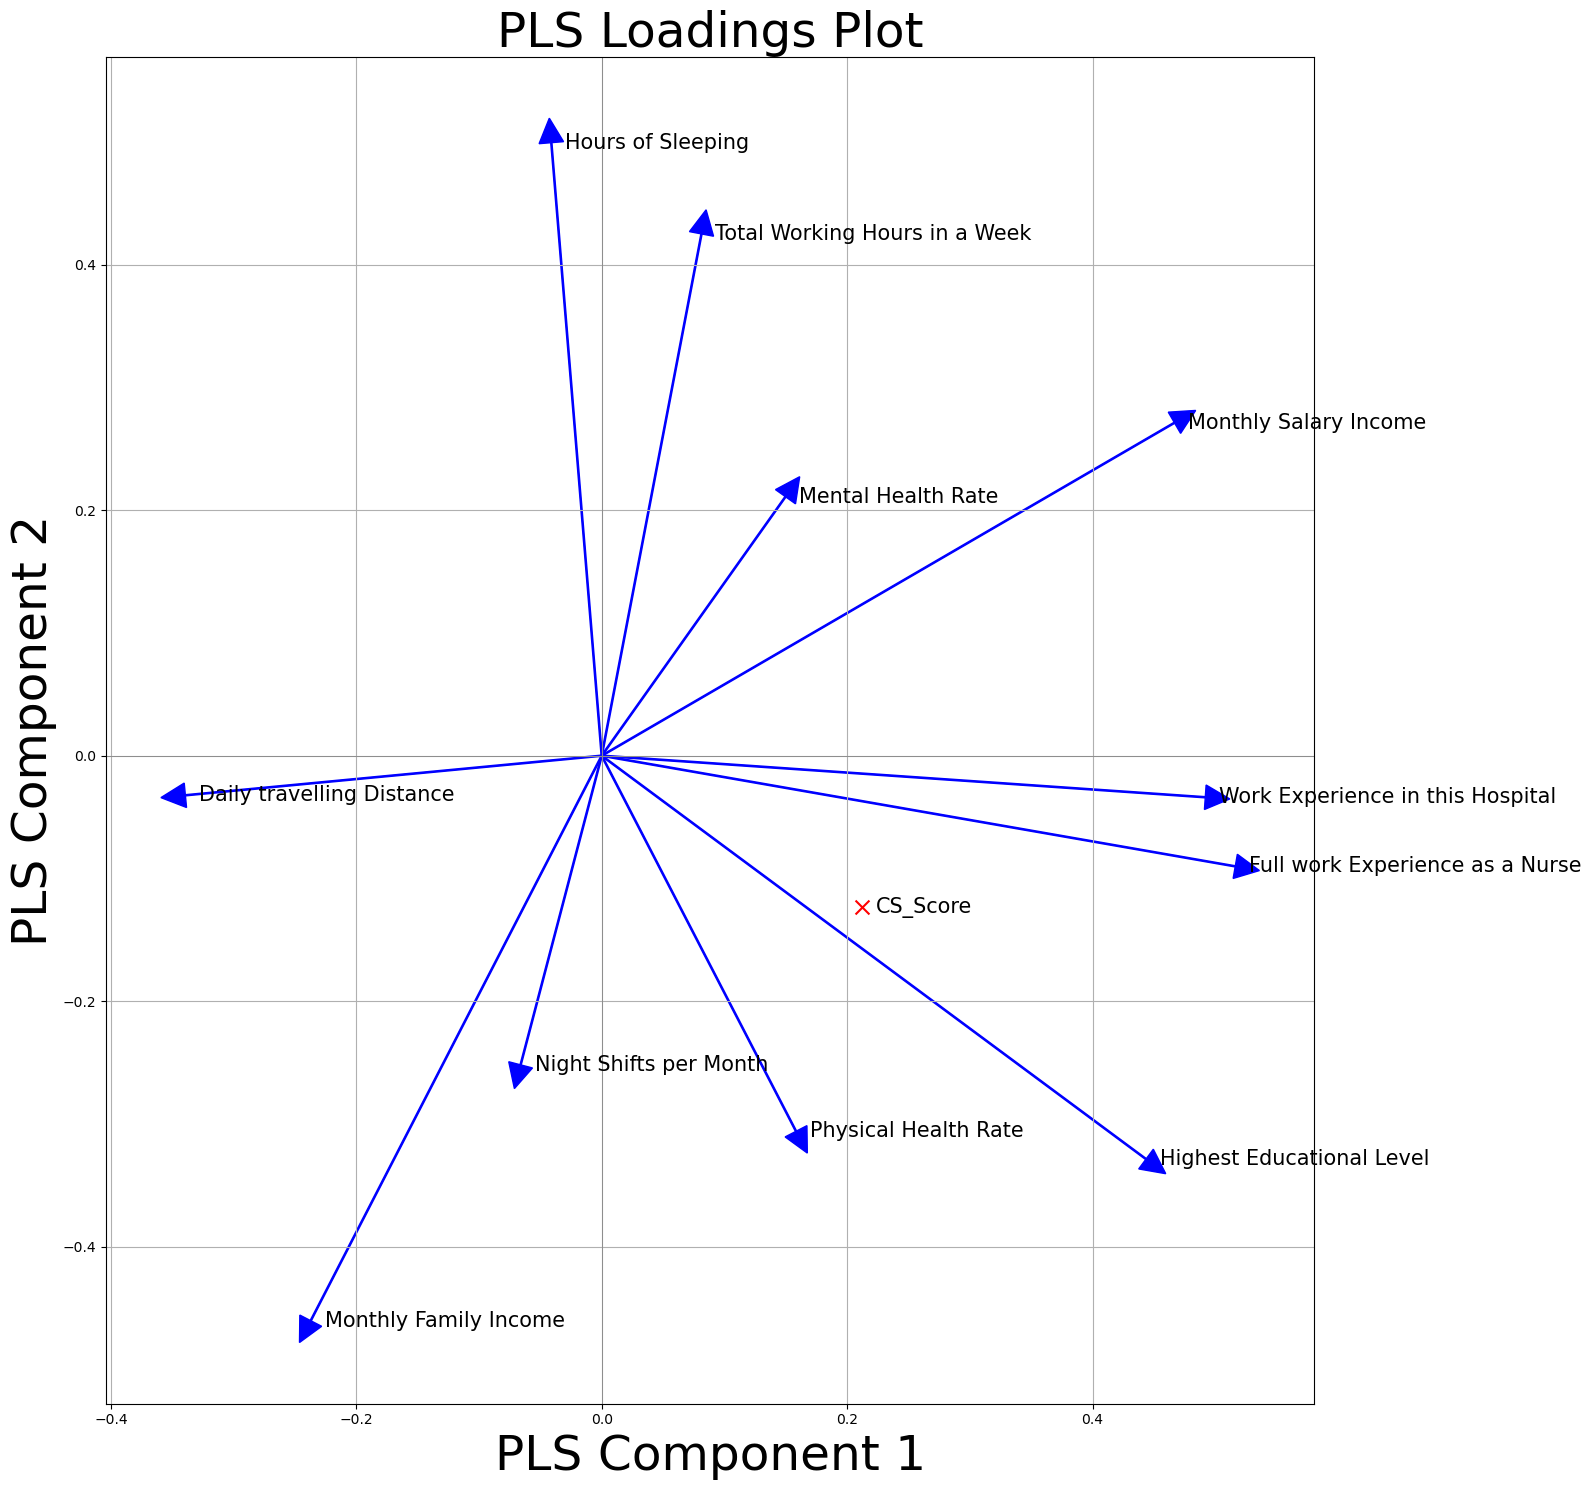

In [49]:
plt.figure(figsize=(15, 15))
feature_names = X.columns.tolist()

# Plot predictor variable loadings
for i in range(num_features):
    plt.arrow(0, 0, x_loadings[i, 0], x_loadings[i, 1], head_width=0.02, head_length=0.02, fc='b', ec='b')
    plt.annotate(feature_names[i], xy=(x_loadings[i, 0], x_loadings[i, 1]), xytext=(10, 0), textcoords='offset points', ha='left', va='center', fontsize=15)

# Plot response variable loading (as a red cross)
plt.scatter(y_loadings[0, 0], y_loadings[0, 1], color='r', marker='x', s=100)
plt.annotate('CS_Score', xy=(y_loadings[0, 0], y_loadings[0, 1]), xytext=(10, 0), textcoords='offset points', ha='left', va='center', fontsize=15)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('PLS Component 1', fontsize=35)
plt.ylabel('PLS Component 2', fontsize=35)
plt.title('PLS Loadings Plot', fontsize=35)
plt.grid()
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.tight_layout()
plt.show()

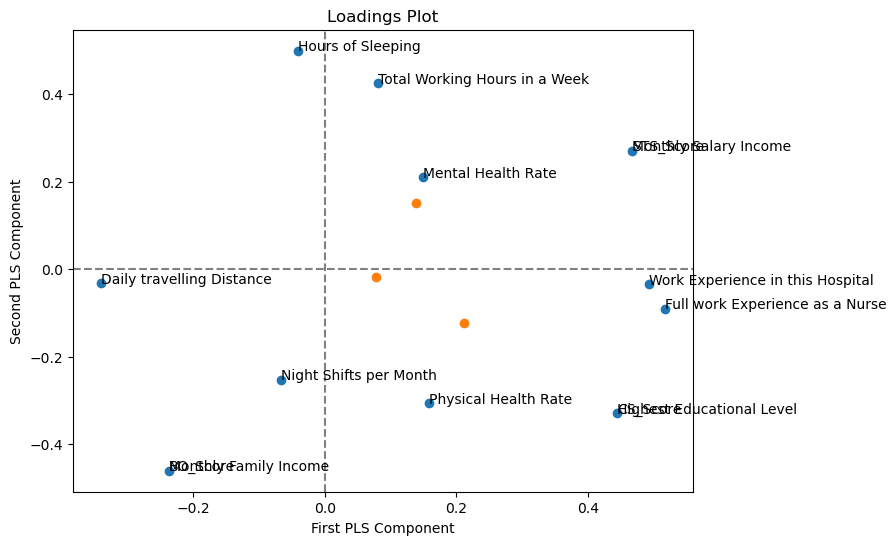

In [50]:
ig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(pls.x_loadings_[:, 0], pls.x_loadings_[:, 1])
plt.scatter(pls.y_loadings_[:, 0], pls.y_loadings_[:, 1])
plt.xlabel('First PLS Component')
plt.ylabel('Second PLS Component')
plt.title('Loadings Plot')

# Annotate the input features
input_features = ['Highest Educational Level','Monthly Family Income','Monthly Salary Income', 'Daily travelling Distance', 'Mental Health Rate','Physical Health Rate','Hours of Sleeping','Work Experience in this Hospital','Full work Experience as a Nurse','Total Working Hours in a Week','Night Shifts per Month']
for i, var in enumerate(input_features):
    plt.annotate(var, (pls.x_loadings_[i, 0], pls.x_loadings_[i, 1]))

# Annotate the output feature
output_features = ['CS_Score','BO_Score','STS_Score']
for i, var in enumerate(output_features):
    plt.annotate(var, (pls.x_loadings_[i, 0], pls.x_loadings_[i, 1]))

# Add horizontal and vertical lines at zero
ax.axhline(y=0, linestyle='--', color='gray')
ax.axvline(x=0, linestyle='--', color='gray')

plt.show()